In [493]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse

In [494]:
dataset_train = datasets.fetch_20newsgroups(subset='train', categories=['alt.atheism', 'sci.space'])
dataset_test = datasets.fetch_20newsgroups(subset='test', categories=['alt.atheism', 'sci.space'])
dataset_all = datasets.fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space'])

In [495]:
X_train = dataset_train.data
y_train = dataset_train.target
X_test = dataset_test.data
y_test = dataset_test.target

In [496]:
vectorizer = TfidfVectorizer()
X_train_trans = vectorizer.fit_transform(X_train)
X_test_trans = vectorizer.transform(X_test)

feature_mapping = vectorizer.get_feature_names()

In [497]:
grid = {'C': np.power(10.0, np.arange(-5, 6))}
cv = KFold(n_splits=5, shuffle=True, random_state=241)
clf = SVC(kernel='linear', random_state=241)

gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv, n_jobs=-1)
gs.fit(X_train_trans, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [498]:
for a in gs.grid_scores_:
    print(a.mean_validation_score)
    print(a.parameters)

0.5526561043802423
{'C': 1e-05}
0.5526561043802423
{'C': 0.0001}
0.5526561043802423
{'C': 0.001}
0.5526561043802423
{'C': 0.01}
0.9179869524697111
{'C': 0.1}
0.9925442684063374
{'C': 1.0}
0.9925442684063374
{'C': 10.0}
0.9925442684063374
{'C': 100.0}
0.9925442684063374
{'C': 1000.0}
0.9925442684063374
{'C': 10000.0}
0.9925442684063374
{'C': 100000.0}


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [499]:
clf_train = SVC(C=1, kernel='linear', random_state=241)
X_all = dataset_all.data
X_all_trans = vectorizer.transform(X_all)
y_all = dataset_all.target
svc = clf_train.fit(X_all_trans, y_all)

In [500]:
word_indexes = np.argsort(np.abs(svc.coef_.toarray()[0]))[-10:]
words = []
for index in word_indexes:
    words.append(feature_mapping[index])
words = sorted(words)
words

['atheism',
 'atheists',
 'bible',
 'god',
 'keith',
 'moon',
 'religion',
 'sci',
 'sky',
 'space']

#coef = svc.coef_
coef = svc.coef_.toarray()[0]
coef

In [501]:
first = []
second = []
for i in range(len(sorted_x)):
    first.append(sorted_x[i][0])
    second.append(sorted_x[i][1])

matrix_dict = {}
cx = scipy.sparse.coo_matrix(coef)    
for i, j, v in zip(cx.row, cx.col, cx.data):
    matrix_dict[j] = v
    

import operator
sorted_x = sorted(matrix_dict.items(), key=operator.itemgetter(1), reverse=True)

for index, x in enumerate(sorted_x):
    new_x = x[0], abs(x[1])
    sorted_x[index] = new_x

sorted_x = sorted(sorted_x, key=operator.itemgetter(1), reverse=True)
sorted_x

words = []
first_ten_x = []
first_ten_y = []
for i in range(10):
    words.append(feature_mapping[sorted_x[i][0]])
    first_ten_x.append(sorted_x[i][0])
    first_ten_y.append(sorted_x[i][1])
    print(sorted_x[i][:2])
words = sorted(words)
print(words)



Text(0,0.5,'Word Coefficient')

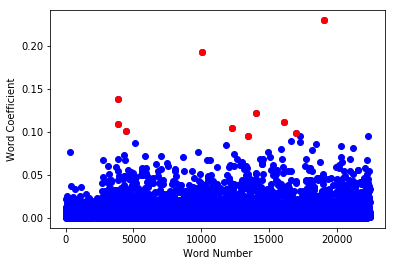

In [517]:
plot_1 = plt.plot(first, second, 'bo')
plot_1 = plt.plot(first_ten_x, first_ten_y, 'ro')
plt.xlabel('Word Number')
plt.ylabel('Word Coefficient')